# Replicating results of Smith and Randall 2015
Purpose of this notebook is to replicate the results of "Rolling element bearing diagnostics using the Case Western
Reserve University data: A benchmark study"
http://dx.doi.org/10.1016/j.ymssp.2015.04.021

In [13]:
import glob

import numpy as np
import matplotlib.pyplot as plt

from randall_methods import randall_method_1, randall_method_3
import data_utils as du

%matplotlib inline


def plot_method_1(title, time, signal, sq_env_f, sq_env, ylim=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ax1.plot(time, signal, c="b", linewidth=0.5)
    ax2.plot(sq_env_f, sq_env, c="b", linewidth=0.5)

    # ax1.set_ylim(-3.5, 3.5)
    # ax2.set_ylim(0, 0.53)
    ax1.set_xlim(0, 0.5)
    ax2.set_xlim(0, 550)
    ax1.set_title("a", loc="left")
    ax2.set_title("b", loc="left")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


def plot_method_3(title, time, signal, sq_env_f, sq_env, ylim=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ax1.plot(time, signal, c="b", linewidth=0.5)
    ax2.plot(sq_env_f, sq_env, c="b", linewidth=0.5)

    ax1.set_xlim(2, 10)
    ax2.set_xlim(0, 550)
    ax1.set_title("a", loc="left")
    ax2.set_title("b", loc="left")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


## 6.3. Drive end bearing faults, 12 kHz data (cf. Table B2)
### 6.3.1. Inner race faults

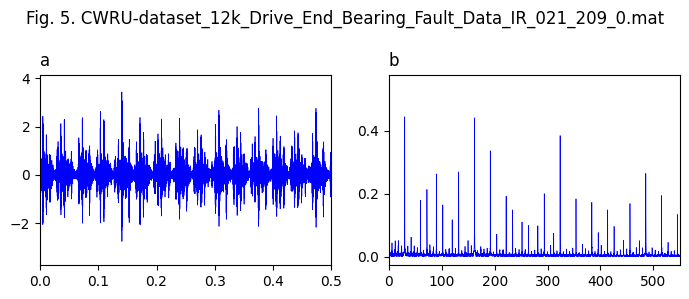

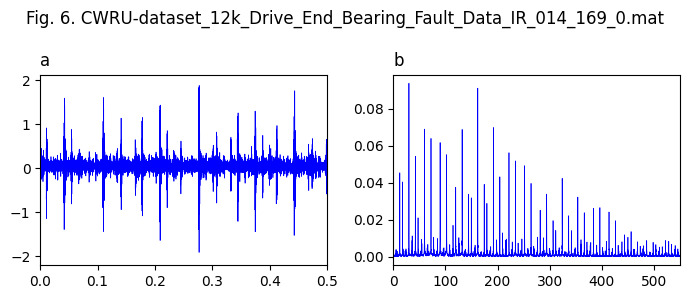

In [8]:
'''
Fig. 5. Record 209DE (12k, 0.021 in. drive end inner race fault, 1797 rpm).
(a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from
Method 1 (raw signal); Y1 diagnosis.
'''
fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*209*.mat", recursive=True)
title = "Fig. 5. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env)

'''
Fig. 6. Record 169DE (12k, 0.014 in. drive end inner race fault, 1797 rpm).
(a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method 1 (raw
signal); Y2 diagnosis.
'''
fs = 12e3
mat_files = glob.glob("CWRU-dataset/**/*169*.mat", recursive=True)
title = "Fig. 6. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env)



## 6.3.2. Ball Faults

()
(2, 12)
Max Level: 2.0
Freq: 0.0625
Fs: 12000.0
Max Kurtosis: 1.1621802319193901
Center frequency: 0.75
Bandwidth: 1500.0
12000.0 750.0 1500.0
6000.0 1e-09 0.25


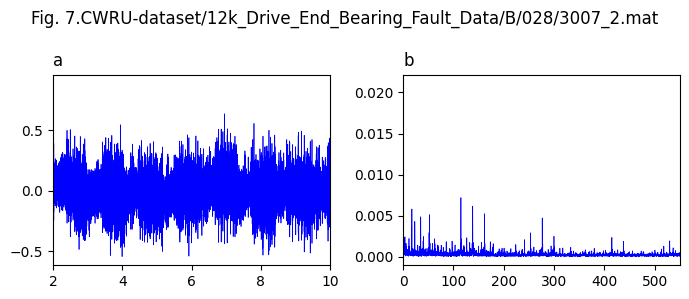

()
(2, 12)
Max Level: 1.584962500721156
Freq: 0.08333333333333334
Fs: 12000.0
Max Kurtosis: 0.1857705406246022
Center frequency: 1.0000000000000002
Bandwidth: 2000.0000000000002
12000.0 1000.0000000000001 2000.0000000000002
6000.0 1e-09 0.33333333333333337


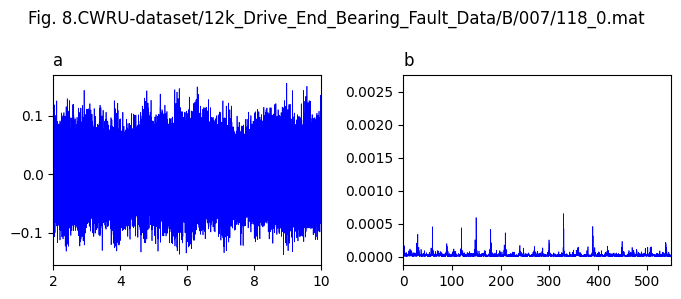

()
(2, 12)
Max Level: 0.0
Freq: 0.25
Fs: 12000.0
Max Kurtosis: 7.74322256504157
Center frequency: 3.0
Bandwidth: 6000.0
12000.0 3000.0 6000.0
6000.0 1e-09 0.99999999


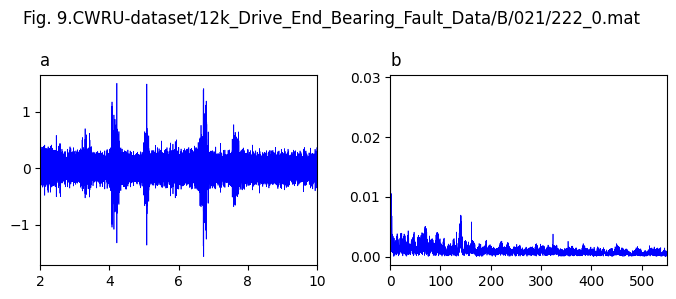

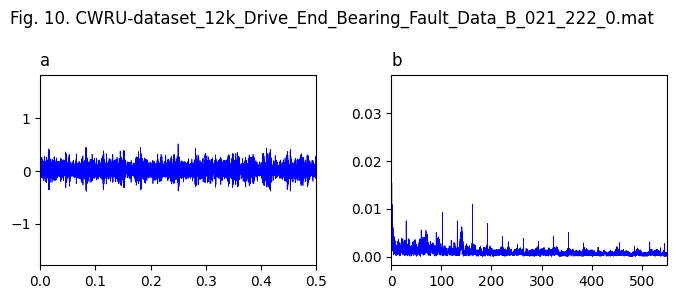

In [16]:
fs = 12e3

''' 
Fig. 7. Record 3007DE (12k, 0.028 in. drive end ball fault, 1750 rpm). Envelope spectrum from Method 3 (benchmark); cursors at: fr (red dot), BSF
harmonics (red dash-dot), sidebands spaced at FTF around 2 × BSF and 4 × BSF (red dot); Y1 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/3007*.mat", recursive=True)
title = "Fig. 7." +  mat_files[0]

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
t, s, sq_env_f, sq_env = randall_method_3(signal, fs, N=16384, Delta=500)

plot_method_3(title, t, s, sq_env_f, sq_env)

'''
Fig. 8. Record 118DE (12k, 0.007 in. drive end ball fault, 1797 rpm). Envelope spectrum from Method 1 (raw signal); finely tuned cursors at FTF (shown to
be 0.4 fr); N1 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/118*.mat", recursive=True)
title = "Fig. 8." +  mat_files[0]

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
t, s, sq_env_f, sq_env = randall_method_3(signal, fs, N=16384, Delta=500)

plot_method_3(title, t, s, sq_env_f, sq_env)

'''
Fig. 9. Record 222DE (12k, 0.021 in. drive end ball fault, 1797 rpm).
Envelope spectrum from Method 3 (benchmark); Y2 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/222*.mat", recursive=True)
title = "Fig. 9." +  mat_files[0]

signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
t, s, sq_env_f, sq_env = randall_method_3(signal, fs, N=16384, Delta=500)

plot_method_3(title, t, s, sq_env_f, sq_env)

'''
Fig. 10. Record 222DE (12k, 0.021 in. drive end ball fault, 1797 rpm).
(a) Raw time signal. (b) Envelope spectrum from Method 1 (raw signal); P1 diagnosis.
'''
mat_files = glob.glob("CWRU-dataset/**/*222*.mat", recursive=True)
title = "Fig. 10. " + mat_files[0].replace("/", "_")
signal, _, _, rpm = du.extract_signals(mat_files[0], normal=False)
time = np.linspace(0, len(signal)/fs, len(signal))

sq_env_f, sq_env = randall_method_1(signal, fs)
plot_method_1(title, time, signal, sq_env_f, sq_env)

### 6.3.3. Outer race faults, fault centred in load zone (6 o’clock)

In [14]:
'''
Fig. 11. Record 133DE (12k, 0.007 in. drive end outer race fault centred, 1730 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method
1 (raw signal); Y1 diagnosis.
'''

'''
Fig. 12. Record 200DE (12k, 0.014 in. drive end outer race fault centred, 1730 rpm). (a) Time signal from Method 3 (benchmark). (b) Corresponding
envelope spectrum; N1 diagnosis.
'''

'''
Fig. 13. Record 197DE (12k, 0.014 in. drive end outer race fault centred, 1797 rpm). (a) Time signal from Method 3 (benchmark); cursors at 1/FTF. (b)
Corresponding envelope spectrum; Y2 diagnosis.
'''

'''
Fig. 14. Record 235DE (12k, 0.021 in. drive end outer race fault centred, 1772 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method
1 (raw signal); Y2 diagnosis
'''

'\nFig. 14. Record 235DE (12k, 0.021 in. drive end outer race fault centred, 1772 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from Method\n1 (raw signal); Y2 diagnosis\n'

### 6.3.4. Outer race faults, fault orthogonal to load zone (3 o’clock)

In [15]:
'''
Fig. 15. Record 144FE (12k, 0.007 in. drive end outer race fault orthogonal, 1797 rpm). Envelope spectrum from Method 1 (raw signal); Y2 diagnosis.
'''

'''
Fig. 16. Record 146DE (12k, 0.007 in. drive end outer race fault orthogonal, 1750 rpm). (a) Raw time signal; cursors at 1/FTF (b) Envelope spectrum from
Method 1 (raw signal); Y2 diagnosis.
'''

'''
Fig. 17. Record 246BA (12k, 0.021 in. drive end outer race fault orthogonal, 1797 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from
Method 1 (raw signal); P1 diagnosis.
'''

'\nFig. 17. Record 246BA (12k, 0.021 in. drive end outer race fault orthogonal, 1797 rpm). (a) Raw time signal; cursors at 1/fr. (b) Envelope spectrum from\nMethod 1 (raw signal); P1 diagnosis.\n'